In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Define a simple CNN architecture
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # First convolutional layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Second convolutional layer
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully connected layer after flattening
        self.fc2 = nn.Linear(128, 10)  # Final layer with 10 output classes (FashionMNIST has 10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU activation after convolution
        x = F.max_pool2d(x, 2)  # Apply max pooling with kernel size 2

        x = F.relu(self.conv2(x))  # Apply ReLU activation after second convolution
        x = F.max_pool2d(x, 2)  # Apply max pooling again

        x = x.view(-1, 32 * 7 * 7)  # Flatten the output of the convolutional layers
        x = F.relu(self.fc1(x))  # Apply ReLU activation after the first fully connected layer
        x = self.fc2(x)  # Output layer

        return x

# Instantiate the model
model = SimpleCNN().to(device)
print(model)


SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Transform: Convert to Tensor and normalize to range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Mean and std for 1 channel (grayscale)
])

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=64, shuffle=False)


In [ ]:
# Step 3: Initialize SimpleCNN model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check if CUDA is available
model = SimpleCNN().to(device)  # Instantiate the MobileNetV3 model and move it to the device

# Define the loss function (CrossEntropyLoss for multi-class classification)
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer with learning rate of 0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)



In [ ]:
model.train()

epochs = 2  # You can increase this for better results

for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx+1}/{len(trainloader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0


Epoch [1/2], Step [100/938], Loss: 0.3294
Epoch [1/2], Step [200/938], Loss: 0.3306
Epoch [1/2], Step [300/938], Loss: 0.3170
Epoch [1/2], Step [400/938], Loss: 0.3288
Epoch [1/2], Step [500/938], Loss: 0.3020
Epoch [1/2], Step [600/938], Loss: 0.2961
Epoch [1/2], Step [700/938], Loss: 0.2954
Epoch [1/2], Step [800/938], Loss: 0.3229
Epoch [1/2], Step [900/938], Loss: 0.3124
Epoch [2/2], Step [100/938], Loss: 0.2876
Epoch [2/2], Step [200/938], Loss: 0.2808
Epoch [2/2], Step [300/938], Loss: 0.2898
Epoch [2/2], Step [400/938], Loss: 0.2947
Epoch [2/2], Step [500/938], Loss: 0.2893
Epoch [2/2], Step [600/938], Loss: 0.3075
Epoch [2/2], Step [700/938], Loss: 0.2969
Epoch [2/2], Step [800/938], Loss: 0.2861
Epoch [2/2], Step [900/938], Loss: 0.3052


In [ ]:
model.eval()

correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
print(f"Test Loss: {test_loss / len(testloader):.4f}")


Test Accuracy: 88.15%
Test Loss: 0.3292


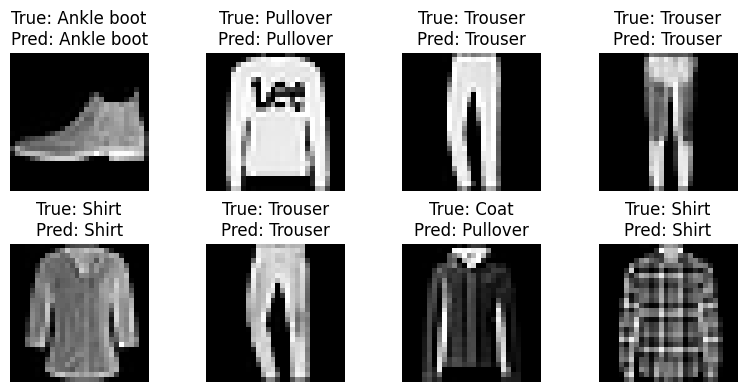

In [ ]:
def plot_samples(images, labels, preds, class_names, n=8):
    plt.figure(figsize=(8, 4))
    for i in range(n):
        plt.subplot(2, 4, i + 1)
        img = images[i].cpu().squeeze()
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

sample_images, sample_labels = next(iter(testloader))

model.eval()
with torch.no_grad():
    outputs = model(sample_images.to(device))
    _, sample_preds = torch.max(outputs, 1)

class_names = trainset.classes
plot_samples(sample_images, sample_labels, sample_preds.cpu(), class_names)
